# Разведывательный анализ данных <a name="Начало"></a>
### Exploratory Data Analysis

### Содержание <a name="Содержание"></a>

1. [Постановка задачи](#Постановка_задачи)
2. [Этап 1. Загрузка данных и первичный осмотр](#Этап_1._Загрузка_данных_и_первичный_осмотр)
3. [Этап 2. Первичный анализ данных в столбцах](#Этап_2._Первичный_анализ_данных_в_столбцах)
4. [Этап 3. Корреляционный анализ числовых переменных](#Этап_3._Корреляционный_анализ_числовых_переменных)
5. [Этап 4. Анализ номинативных переменных](#Этап_4._Анализ_номинативных_переменных)
6. [Этап 5. Обработка данных. Устранение пропусков и выбросов](#Этап_5._Обработка_данных._Устранение_пропусков_и_выбросов)
7. [Этап 6. Подготовка данных к использованию в моделе](#Этап_6._Подготовка_данных_к_использованию_в_моделе)
8. [Гипотезы и итоги исследований](#Гипотезы_и_итоги_исследований)

### Постановка задачи <a name="Постановка_задачи"></a>

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.  
**Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.**  

Необходимо провести разведывательный анализ данных с целью определения признаков и параметров для построения модели, которая бы предсказывала результаты госэкзамена по математике для каждого ученика школы.

**Описание набора данных**:
1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

### Этап 1. Загрузка данных и первичный осмотр <a name="Этап_1._Загрузка_данных_и_первичный_осмотр"></a>

In [3]:
students = pd.read_csv('stud_math.csv')
students.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
students.shape

(395, 30)

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
students.nunique()

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

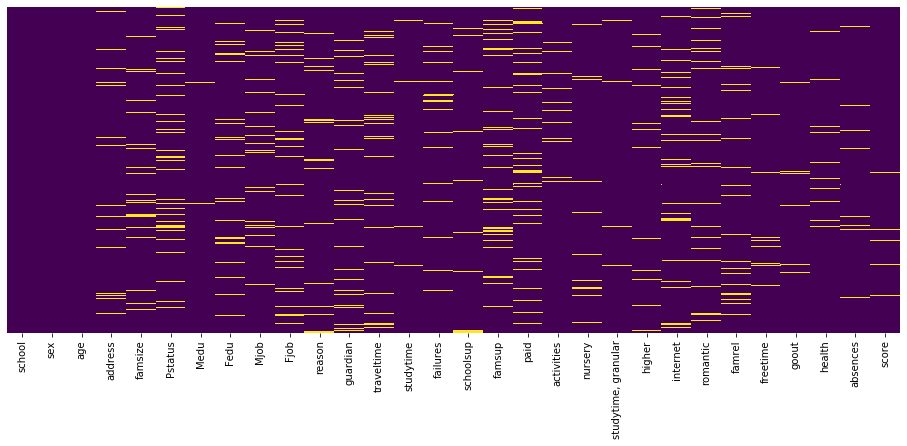

In [7]:
#Анализ пропусков в столбцах
plt.figure(figsize=(16, 6))
sns.heatmap(students.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

### Выводы Этапа 1:
Данные считались корректно. Первичный осмотр данных показывает что в наборе 395 строк, 30 столбцов. Преобладают номинативные переменные (все, кроме **score, absences и age**). В данных относительно мало пропусков: больше всего в столбце **Pstatus (11 %)**.

[К началу](#Начало)

### Этап 2. Первичный анализ данных в столбцах <a name="Этап_2._Первичный_анализ_данных_в_столбцах"></a>

На этом этапе посмотрим на данные, сформулируем некоторые гипотезы и оценим (в первом приближении) влияние различных признаков на целевую переменную. Устраним некоторые явные ошибки и выбросы.

Посмотрим, также, на саму целевую переменную. Тем самым попробуем отобрать признаки для дальнейшей обработки, как то заполнение пропусков и устранение выбросов.

In [8]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [9]:
#Переименуем столбцы
students.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                    'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
                    'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
                    'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel',
                    'freetime', 'go_out', 'health', 'absences', 'score']

In [10]:
#Столбцы с пробелами в качестве отсутствующих значений
def search_empty_values(column):
    if str(students[column].dtype) == 'object':
        if True in ((students[column].str.strip() == '').tolist()):
            print(column, end=' ')
            
for col in students.columns.tolist():
    search_empty_values(col)

**Замечание:** Строковые данные не содержат пробелов в качестве отсутствующих значений.

[К началу](#Начало)

In [11]:
def analyse_numeric(column):
    '''Функция для визуализации распределения.
       Принимает параметром строковое название столбца
       Печатает различные статистические показатели и строит гистограмму'''
    count = students[column].count()
    mean = students[column].mean()
    std = students[column].std()
    median = students[column].median()
    perc25 = students[column].quantile(0.25)
    perc75 = students[column].quantile(0.75)
    IQR = perc75 - perc25
    range_min = students[column].min()
    range_max = students[column].max()
    margin = (range_max - range_min)/10
    range_start = range_min - margin
    range_stop = range_max + margin
    range_ = (range_start, range_stop)
    outliers = students[column].loc[(students[column] < perc25 - 1.5*IQR) | (students[column] > perc75 + 1.5*IQR)]

    print('Количество: {}, Среднее: {:.3f}, Стандартное отклонение: {:.3f}.'.format(count, mean, std))
    print('Минимум: {}, 25-й перцентиль: {}, Медиана: {}, 75-й перцентиль: {}, Максимум: {}, IQR: {}.'
          .format(range_min, perc25, median, perc75, range_max, IQR))
    print('Количество пропусков в столбце: ', pd.isnull(students[column]).sum())
    print('Границы выбросов: [{f}, {l}].'.format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR)
          , 'Количество выбросов: ', len(outliers))

    students[column].loc[students[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)] \
                    .hist(bins = 30, range = range_, label = 'В границах выбросов')
    outliers.hist(bins = 30, range = range_, label = 'Выбросы')
    
    plt.legend()

### school и sex

In [12]:
pd.DataFrame(students.school.value_counts())

,school
GP,349
MS,46


In [13]:
pd.DataFrame(students.sex.value_counts())

,sex
F,208
M,187


**Замечание:** Наблюдения проводились среди учеников двух школ. Мальчиков и девочек примерно поровну (девочек больше на 21). Пропусков нет.

[К началу](#Начало)

### age

In [14]:
pd.DataFrame(students.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Количество: 395, Среднее: 16.696, Стандартное отклонение: 1.276.
Минимум: 15, 25-й перцентиль: 16.0, Медиана: 17.0, 75-й перцентиль: 18.0, Максимум: 22, IQR: 2.0.
Количество пропусков в столбце:  0
Границы выбросов: [13.0, 21.0]. Количество выбросов:  1


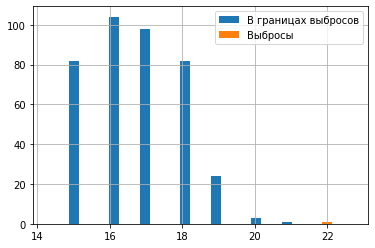

In [15]:
analyse_numeric('age')

**Замечание:** Данные содержат 1 выброс. Устраним его, заменив мендианным значением

In [16]:
students.loc[students['age'] == 22, 'age'] = students['age'].median()

**Замечание:** Основной диапазон возраста студентов (99%) 15 - 19 лет. Пропусков нет.
[К началу](#Начало)

### address

In [17]:
display(pd.DataFrame(students.address.value_counts()))
students.loc[:, ['address']].info()

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Замечание:** 75% городских, 21% областных, 4% пропусков (17 штук). Так как в обоих группах достаточно много данных, как заполнять пропуски - пока не понятно.

[К началу](#Начало)

### fam_size

In [18]:
display(pd.DataFrame(students.fam_size.value_counts()))
students.loc[:, ['fam_size']].info()

,fam_size
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Замечание:** В 66% случаев в семье > 3 человек, в 27% случаев в семье <= 3 человек, 7% пропусков (27 штук). Так как в обоих группах достаточно много данных, как заполнять пропкски - пока не понятно.

[К началу](#Начало)

### p_status

In [19]:
display(pd.DataFrame(students.p_status.value_counts()))
students.loc[:, ['p_status']].info()

,p_status
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Замечание:** В основном родители студентов живут вместе, и только 9% - отдельно. 11% пропусков (45 штук).  Как заполнять пропкски - пока не понятно.

[К началу](#Начало)

### m_edu

,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


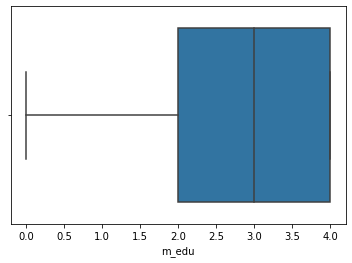

In [20]:
display(pd.DataFrame(students['m_edu'].value_counts()))
students.loc[:, ['m_edu']].info()
sns.boxplot(x=students['m_edu'])

**Замечание:** В столбце 3 пропуска, выбросов нет.

[К началу](#Начало)

### f_edu

,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


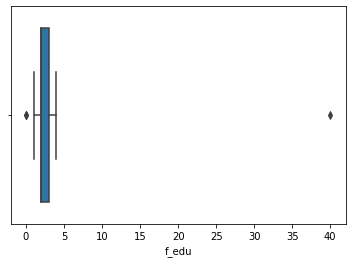

In [21]:
display(pd.DataFrame(students['f_edu'].value_counts()))
students.loc[:, ['f_edu']].info()
sns.boxplot(x=students['f_edu'])

**Замечание:** Столбец f_edu содержит явный выброс - значение 40. Скорее всего, это ошибка при внесении (сборе данных) и напрашивается замена его на значение 4. Так с ним поступим. Другой (технический) выброс (значение 0) не трогаем, так как возможна потеря важных данных. Столбец содержит, также 24 пропуска (6%).

[К началу](#Начало)

In [22]:
students.loc[students['f_edu'] == 40, 'f_edu'] = 4

### m_job

In [23]:
display(pd.DataFrame(students['m_job'].value_counts()))
students.loc[:, ['m_job']].info()

,m_job
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Замечание:** Столбец содержит 19 пропусков (5%) и большое количество значений other. Чем заполнить пропуски пока не ясно.

[К началу](#Начало)

### f_job

In [24]:
display(pd.DataFrame(students['f_job'].value_counts()))
students.loc[:, ['f_job']].info()

,f_job
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Замечание:** Столбец содержит 36 пропусков (9%) и большое количество значений other. Чем заполнить пропуски пока не ясно.

[К началу](#Начало)

### reason

In [25]:
display(pd.DataFrame(students['reason'].value_counts()))
students.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Замечание:** 17 пропусков (4%).

[К началу](#Начало)

### guardian

In [26]:
display(pd.DataFrame(students['guardian'].value_counts()))
students.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Замечание:** Среди опекунов преобладают матери. 31 пропуск (8%).

[К началу](#Начало)

### travel_time

Количество: 367, Среднее: 1.439, Стандартное отклонение: 0.694.
Минимум: 1.0, 25-й перцентиль: 1.0, Медиана: 1.0, 75-й перцентиль: 2.0, Максимум: 4.0, IQR: 1.0.
Количество пропусков в столбце:  28
Границы выбросов: [-0.5, 3.5]. Количество выбросов:  7


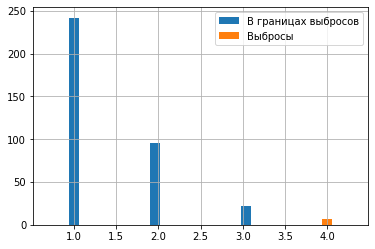

In [27]:
analyse_numeric('travel_time')

**Замечание:** В основном время в пути < 30 минут (> 75%). Данные содержат 28 пропусков (7%). Есть выбросы - 7 штук.

**Гипотеза 1:** Возможно, здесь нужен дополнительный анализ по связи столбцов address и travel_time. Возможно у тех, кто живет в городе, travel_time будет меньше.

Пока выбросы не трогаем!

[К началу](#Начало)

### study_time и studytime_granular

In [28]:
students[['study_time', 'studytime_granular']].corr()

,study_time,studytime_granular
study_time,1.0,-1.0
studytime_granular,-1.0,1.0


**Замечание:** Значения в столбце **studytime_granular** полностью определяются значениями столбца **study_time** (100% - ная обратная корреляция), поэтому столбец studytime_granular можно удалить.

In [29]:
students.drop(['studytime_granular'], inplace = True, axis = 1)

Количество: 388, Среднее: 2.039, Стандартное отклонение: 0.842.
Минимум: 1.0, 25-й перцентиль: 1.0, Медиана: 2.0, 75-й перцентиль: 2.0, Максимум: 4.0, IQR: 1.0.
Количество пропусков в столбце:  7
Границы выбросов: [-0.5, 3.5]. Количество выбросов:  27


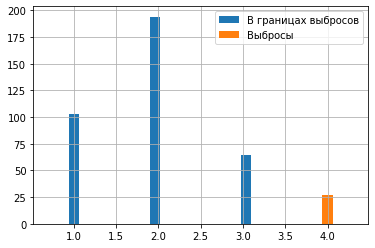

In [30]:
analyse_numeric('study_time')

**Замечание:** В столбце есть 7 пропусков и выбросы. Возможно пропуски можно заменить медианой.

Выбросы пока не трогаем

[К началу](#Начало)

### failures

Количество: 373, Среднее: 0.338, Стандартное отклонение: 0.743.
Минимум: 0.0, 25-й перцентиль: 0.0, Медиана: 0.0, 75-й перцентиль: 0.0, Максимум: 3.0, IQR: 0.0.
Количество пропусков в столбце:  22
Границы выбросов: [0.0, 0.0]. Количество выбросов:  80


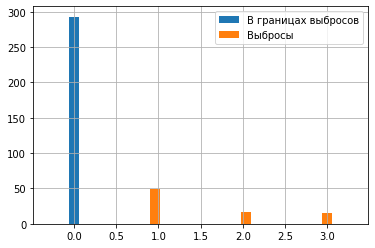

In [31]:
analyse_numeric('failures')

In [32]:
students.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [33]:
students[['score', 'failures']].corr()

,score,failures
score,1.000000,-0.344338
failures,-0.344338,1.000000


**Замечание:** В столбце 22 пропуска.

**Гипотеза 2:** Хотя признак failures - категориальный, а score - числовой, все таки видно, что чем меньше failures, тем больше score. поэтому можно попробовать заполнить пропуски в failures значением 0 для тех записей, где score высокий и значением 1, где score низкий. Например, для score 0-30 взять 1, а для score 31-100 взять 0

Выбросы пока не трогаем, так как их очень много и есть подозрение, что этот сильно признак влияет на score

[К началу](#Начало)

### school_sup, fam_sup, paid, activities, nursery, higher, internet, romantic

Для удобства и подготовки к построению модели, заменим "yes", "no" на 1 и 0

In [34]:
cols = ['school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [35]:
for col in cols:
    students.loc[students[col] == 'no', col] = 0.0
    students.loc[students[col] == 'yes', col] = 1.0

In [36]:
for col in cols:
    display(pd.DataFrame(students[col].value_counts()))
    students.loc[:, [col]].info()

,school_sup
0.0,335
1.0,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,fam_sup
1.0,219
0.0,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,paid
0.0,200
1.0,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,activities
1.0,195
0.0,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,nursery
1.0,300
0.0,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,higher
1.0,356
0.0,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,internet
1.0,305
0.0,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,romantic
0.0,240
1.0,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Замечание:** Данные в столбцах содержат пропуски, максимально в колонке paid - 40 пропусков (10%)
[К началу](#Начало)

### fam_rel, freetime, go_out, health

In [37]:
cols = ['fam_rel', 'freetime', 'go_out', 'health']
for col in cols:
    display(pd.DataFrame(students[col].value_counts()))
    students.loc[:, [col]].info()

,fam_rel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**Замечание:** Признак fam_rel содержит ошибку в данных (значение -1). Наиболее вероятно, что там должна быть 1

In [38]:
students.loc[students['fam_rel'] == -1.0, 'fam_rel'] = 1.0

Количество: 368, Среднее: 3.943, Стандартное отклонение: 0.904.
Минимум: 1.0, 25-й перцентиль: 4.0, Медиана: 4.0, 75-й перцентиль: 5.0, Максимум: 5.0, IQR: 1.0.
Количество пропусков в столбце:  27
Границы выбросов: [2.5, 6.5]. Количество выбросов:  25


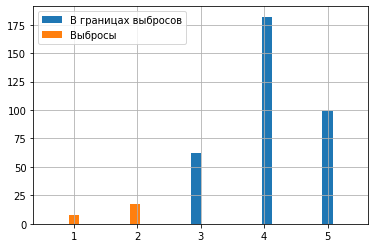

In [39]:
analyse_numeric('fam_rel')

Количество: 384, Среднее: 3.232, Стандартное отклонение: 0.994.
Минимум: 1.0, 25-й перцентиль: 3.0, Медиана: 3.0, 75-й перцентиль: 4.0, Максимум: 5.0, IQR: 1.0.
Количество пропусков в столбце:  11
Границы выбросов: [1.5, 5.5]. Количество выбросов:  18


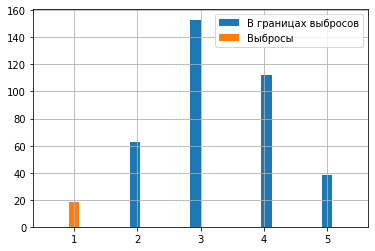

In [40]:
analyse_numeric('freetime')

Количество: 387, Среднее: 3.106, Стандартное отклонение: 1.116.
Минимум: 1.0, 25-й перцентиль: 2.0, Медиана: 3.0, 75-й перцентиль: 4.0, Максимум: 5.0, IQR: 2.0.
Количество пропусков в столбце:  8
Границы выбросов: [-1.0, 7.0]. Количество выбросов:  0


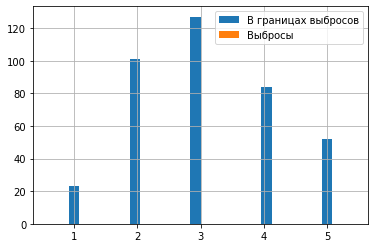

In [41]:
analyse_numeric('go_out')

Количество: 380, Среднее: 3.532, Стандартное отклонение: 1.396.
Минимум: 1.0, 25-й перцентиль: 3.0, Медиана: 4.0, 75-й перцентиль: 5.0, Максимум: 5.0, IQR: 2.0.
Количество пропусков в столбце:  15
Границы выбросов: [0.0, 8.0]. Количество выбросов:  0


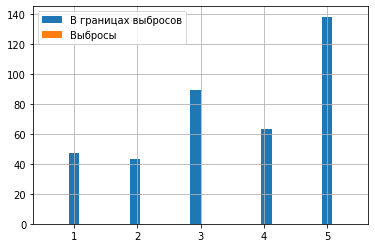

In [42]:
analyse_numeric('health')

**Замечание:** Данные содержат пропуски, максимальное число которых в колонке fam_rel - 27 штук (7%).

Выбросы не трогаем до теста Стьюдента

**Гипотеза 3:** Распределения freetime и go_out похожи. Возможно (и достаточно логично), что между ними есть связь.

[К началу](#Начало)

### absences

Количество: 383, Среднее: 7.279, Стандартное отклонение: 23.465.
Минимум: 0.0, 25-й перцентиль: 0.0, Медиана: 4.0, 75-й перцентиль: 8.0, Максимум: 385.0, IQR: 8.0.
Количество пропусков в столбце:  12
Границы выбросов: [-12.0, 20.0]. Количество выбросов:  17


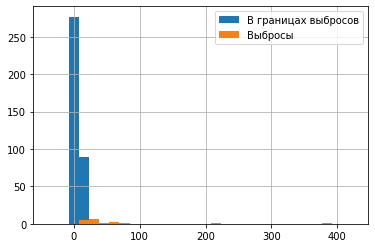

In [43]:
analyse_numeric('absences')

In [44]:
students[students['absences'] > 200]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
222,GP,F,16.0,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,1,NaN,0,0,1,1,1,0,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20.0,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,0,1,1,0,1,1,0,0,5.0,5.0,4.0,4.0,212.0,45.0


**Замечание:** Больше всего значений =0. Это несколько странно (у нас другой менталитет!), когда у такого количества студентов ни одного пропуска. Далее, есть два экстремальных (возможно, ошибочных) значения, =385 и =212. Имеется 12 пропусков.

Что делать с пропусками и как интерпретировать экстремальные значения, пока не ясно. Данных у нас не много, всего 395 строк, так что если и удалять выбросы, то только два самых дальних.

### score

Количество: 389, Среднее: 52.262, Стандартное отклонение: 22.919.
Минимум: 0.0, 25-й перцентиль: 40.0, Медиана: 55.0, 75-й перцентиль: 70.0, Максимум: 100.0, IQR: 30.0.
Количество пропусков в столбце:  6
Границы выбросов: [-5.0, 115.0]. Количество выбросов:  0


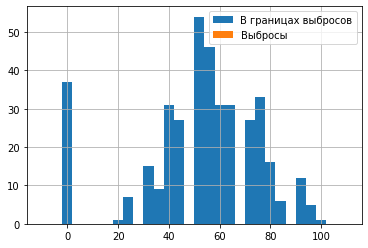

In [45]:
analyse_numeric('score')

In [46]:
print(len(students[students['score'] < 20]), len(students[students['score'] == 0]))

37 37


**Замечание:** Видно, что значения score разделены на две группы - 1) score = 0 и 2) 20 <= score <= 100. 37 значений score = 0 и 6 пропусков.

**Гипотеза 4:** Так как между 0 и 20 значения отсутствуют, то возможно, значения score = 0 и пропуски - это внештатные ситуации, как то неявка на экзамен, студент выбыл, и возможно, другие. Поэтому нужно выделить значения 0 и пропуски в отдельную группу, введя дополнительную бинарную целевую переменную null_score, и анализировать влияние признаков на целевые переменные score и null_score отдельно.

In [47]:
students.loc[students['score'] == 0.0, 'score'] = np.nan
students['null_score'] = students.score.apply(lambda x: 1 if pd.isnull(x) else 0)

[К началу](#Начало)

### Выводы Этапа 2:
В ходе первичного анализа данных в столбцах были устранены некоторые ошибки и выбросы. Также были сформулированы четыре гипотезы о свойствах данных (все гипотезы будут подитожены в отдельном разделе ниже)

Также, в связи с характером распределения целевой переменной **score**, была введена дополнительная целевая переменная **null_score** с тем, чтобы отдельно проанализировать влияние признаков на эти переменные.

[К началу](#Начало)

### Этап 3. Корреляционный анализ числовых переменных <a name="Этап_3._Корреляционный_анализ_числовых_переменных"></a>
На этом этапе проведем корреляционный анализ переменных **age**, absences и **score** и продолжим формулировать гипотезы

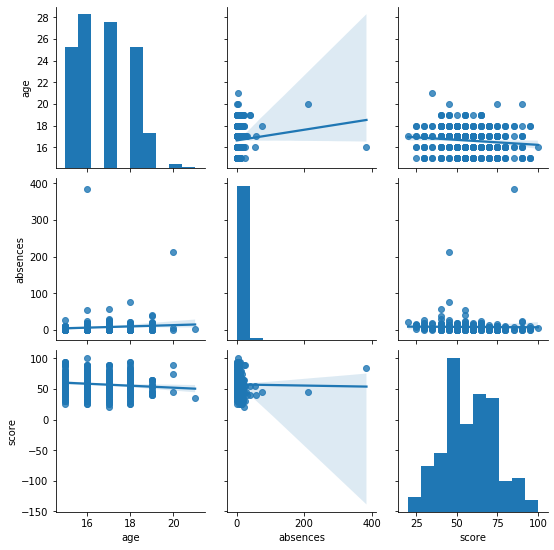

In [48]:
sns.pairplot(students[['age', 'absences', 'score']], kind = 'reg')

In [49]:
students[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.091884,-0.122329
absences,0.091884,1.000000,-0.014039
score,-0.122329,-0.014039,1.000000


Отфильтруем данные по признаку absences и повторим вычисления

In [50]:
temp = students.loc[(students.absences <= 100)]

In [51]:
print(len(students), len(temp))

395 381


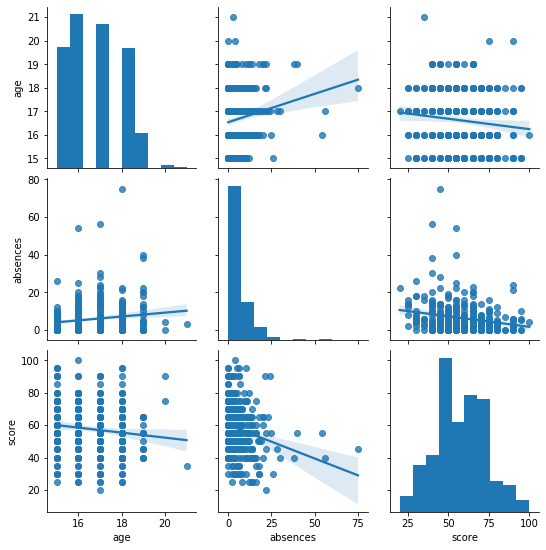

In [52]:
sns.pairplot(temp[['age', 'absences', 'score']], kind = 'reg')

In [53]:
temp[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.157310,-0.116763
absences,0.157310,1.000000,-0.214926
score,-0.116763,-0.214926,1.000000


**Замечание:** После отфильтрования выбросов и пропусков признака absences связь между признаками видна более отчетливо.

**Гипотеза 5:** В целом можно сказать, что с увеличением возраста (age) и числа пропусков занятий (absences) есть тенденция к уменьшению значения  экзаменационного балла.

#### Также для получения общего представления о связях между столбцами, пожно построить heat map для корреляционной таблицы:

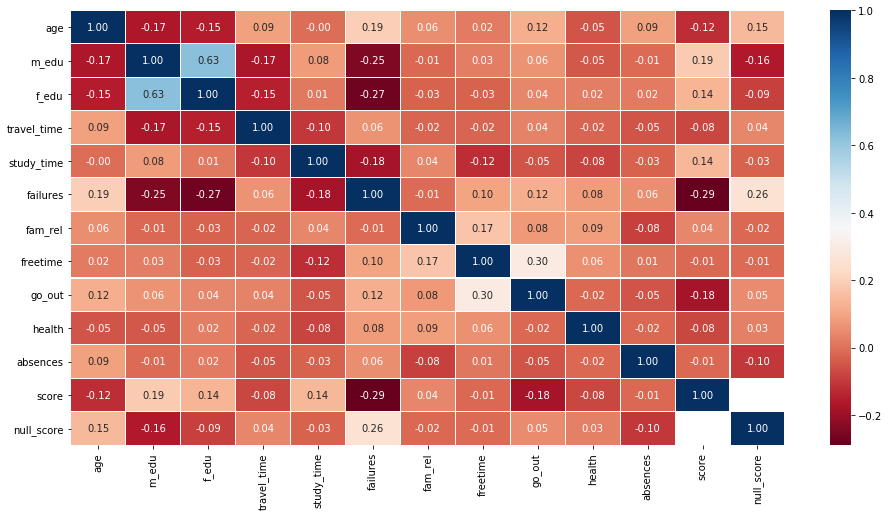

In [54]:
plt.figure(figsize=(16,8))
sns.heatmap(((students.corr())), fmt = '.2f', cmap='RdBu', linewidth = 0.1, annot=True)

**Замечание:** на тепловой карте тоже можно увидеть, что есть связь, к примеру, между столбцами go_out <-> freetime и m_edu <-> f_edu

### Выводы этапа 3:
Корреляционный анализ числовых переменных показал, что значения признаков age и absences ощутимо влияют на целевую переменную score. Значит нужно почистить absences от пропусков и выбросов и рекомендовать признаки **age** и **absences** для использования при построении модели.

[К началу](#Начало)

### Этап 4. Анализ номинативных переменных <a name="Этап_4._Анализ_номинативных_переменных"></a>

На этом этапе проведем анализ номинативныз переменных и их влияния на целевые переменные

### Box Plots

In [55]:
def get_boxplot(column, target):
    '''Строит boxplot - график для визуализации влияния признака column
       на целевую переменную target.
       Параметры:
       - column - столбец датафрейма students (влияющий признак)
       - target - целевая переменная'''
    fig, ax = plt.subplots(figsize = (10, 3))
    sns.boxplot(x=column, y=target, 
                data=students[[column, target]],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

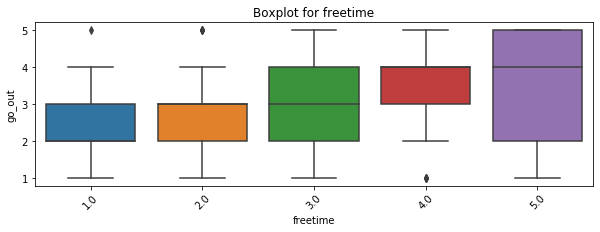

In [56]:
#Отдельно проверим Гипотезу 3 о связи переменных freetime и go_out
get_boxplot('freetime', 'go_out')

**Замечание:** Видим, что чем больше свободного времени, тем больше времени студенты проводят с друзьями.

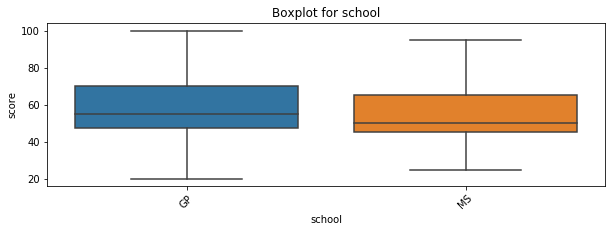

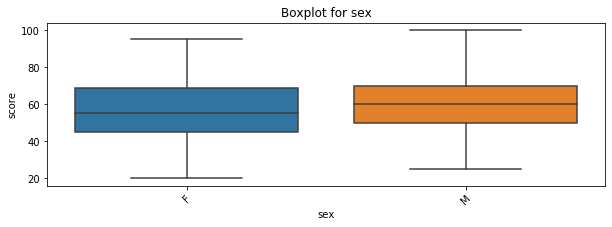

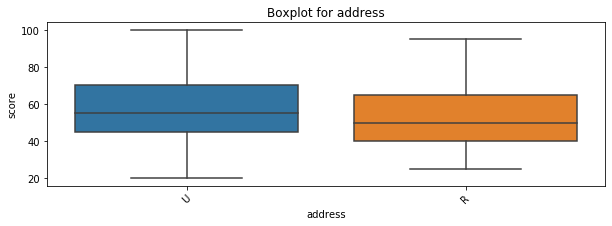

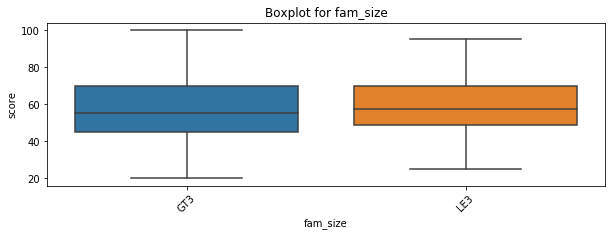

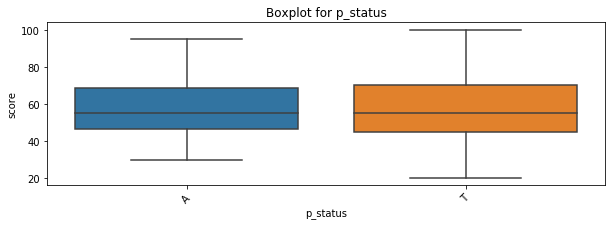

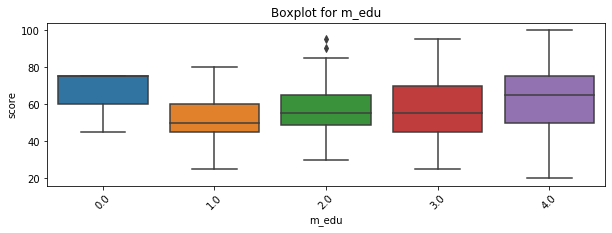

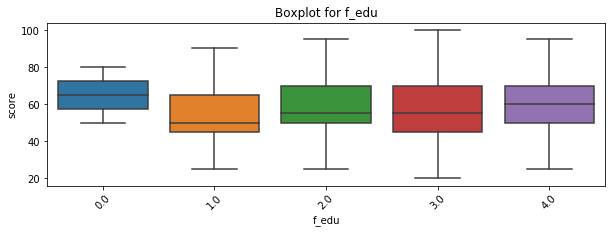

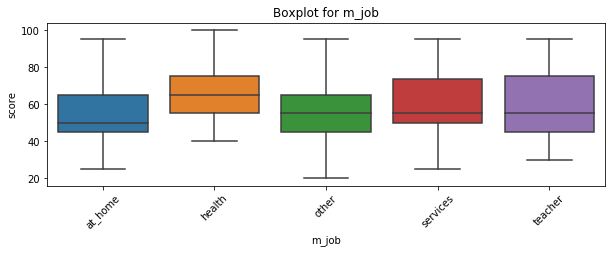

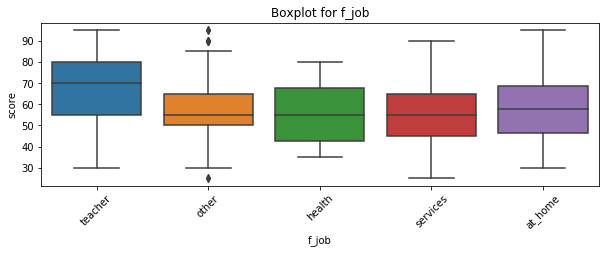

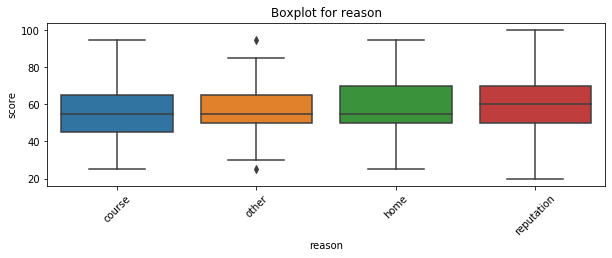

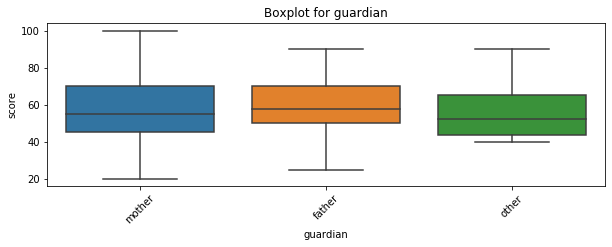

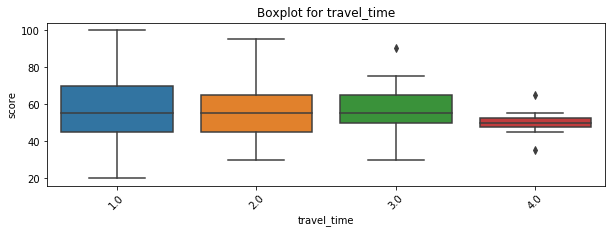

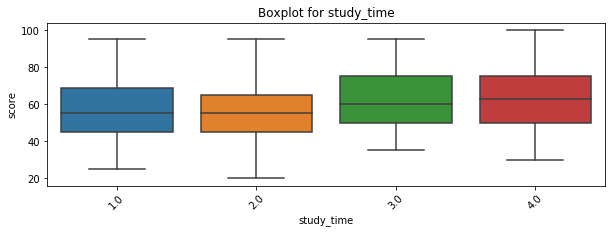

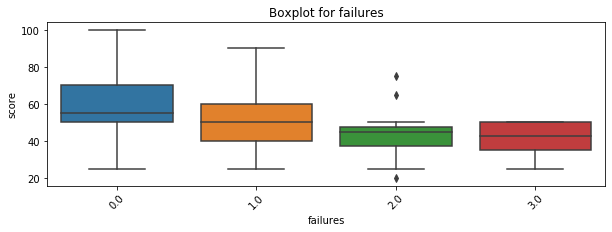

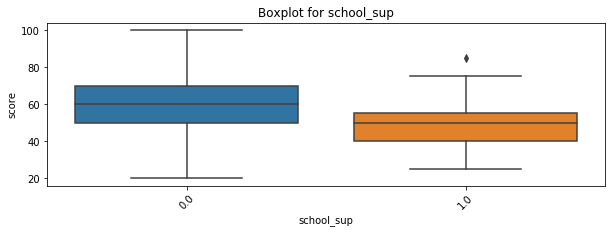

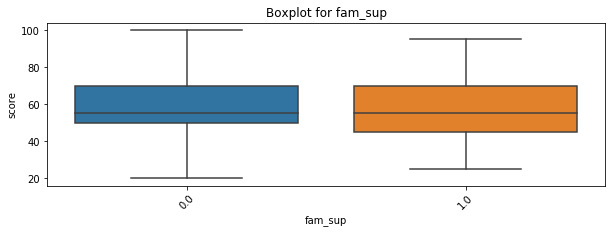

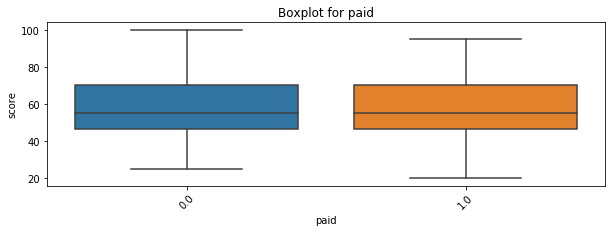

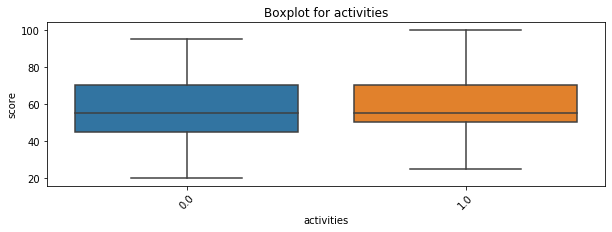

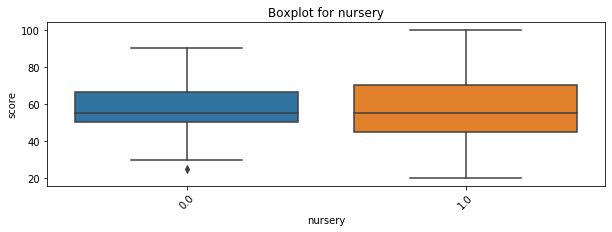

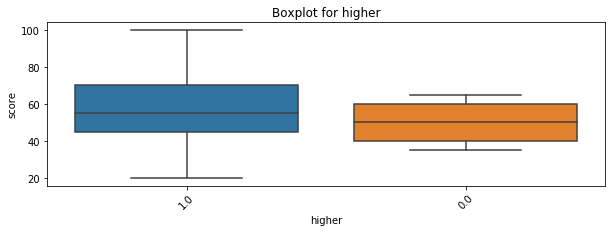

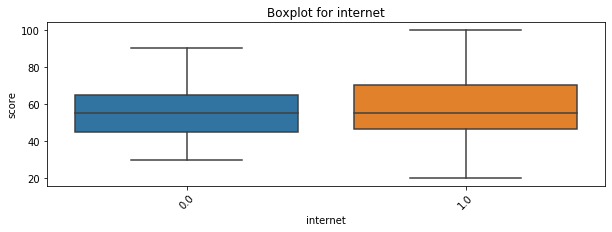

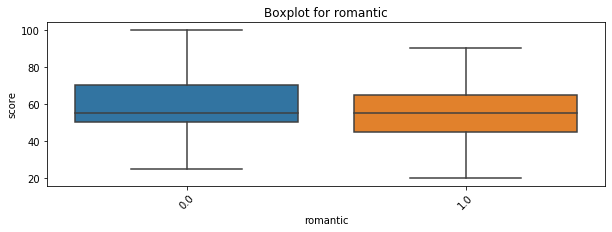

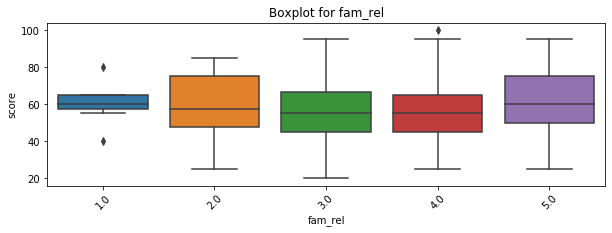

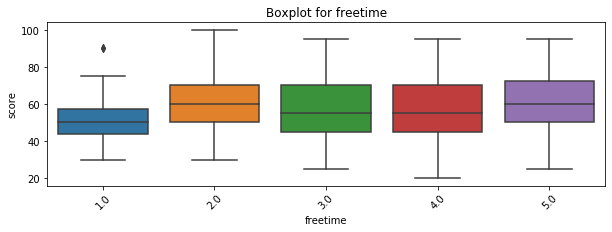

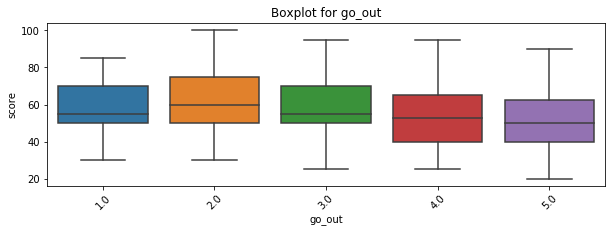

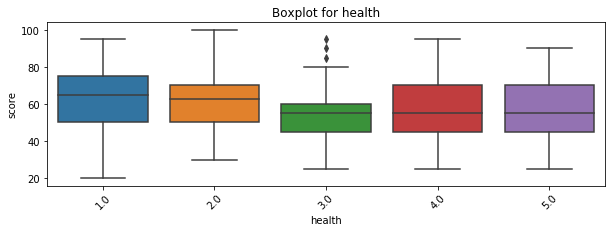

In [57]:
#Построим графики boxplot по номинативным признакам
for col in students.columns.tolist():
    if col not in (['age', 'absences', 'score', 'null_score']):
        get_boxplot(col, 'score')

**Замечание:** Визуальный осмотр графиков показывает, что возможно, следующие признаки оказывают влияние на целевую переменную **score: m_edu, f_edu, m_job, f_job, failures, scool_sup, go_out**.
Однако для более точной оценки необходимо провести тест Стьюдента.

[К началу](#Начало)

### Тест Стьюдента
Проверим для различных колонок нулевую гипотезу **H0** о том, что изменение значений  в колонке не дает статистически значимых различий целевой переменной.
Проверку сделаем отдельно для целевых переменных **score** и **null_score**.

In [58]:
def get_stat_dif(data, column, target):
    '''Проверяет, есть ли статистичеки значимые различия
       в целевой переменной target для солонки column.
       Параметры:
       data - датафрейм
       column - колонка
       target - целевая переменная'''
    cols = data.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], target], 
                     data.loc[data.loc[:, column] == comb[1], target],
                     nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [59]:
#Отделим студентов с ненулевым баллом
students_score = students[~pd.isnull(students['score'])]
len(students_score)

352

In [60]:
#Для целевой переменной score
for col in students.columns.tolist():
    if col not in (['age', 'absences', 'score', 'null_score']):
        get_stat_dif(students_score, col, 'score')

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки f_job
Найдены статистически значимые различия для колонки study_time
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки school_sup
Найдены статистически значимые различия для колонки go_out


In [61]:
#Для целевой переменной null_score
for col in students.columns.tolist():
    if col not in (['age', 'absences', 'score', 'null_score']):
        get_stat_dif(students, col, 'null_score')

Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


### Выводы Этапа 4:
Мы получили список столбцов, значения в которых статистически значимо влияют на целевые переменные score и null_score (столбцов, для которых отвергли гипотезу H0):

**address, m_edu, f_edu, m_job, f_job, study_time, failures, school_sup, go_out**

и

**guardian, paid, higher, romantic**

[К началу](#Начало)

### Этап 5. Обработка данных. Устранение пропусков и выбросов <a name="Этап_5._Обработка_данных._Устранение_пропусков_и_выбросов"></a>
По результатом предыдущих этапов был получен список  из 15-ти столбцов, которые оказывают статистически значимое влияние на целевые переменные **score и null_score**:
**age, absences, address, m_edu, f_edu, m_job, f_job, study_time, failures, school_sup, go_out, guardian, paid, higher, romantic**

На данном этапе устраним выбросы и заполним пропуски в этих столбцах.

### age

В столбце нет пропусков. Единственный выброс мы удалили ранее.

### absences

В столбце есть два (гипотетически) ошибочных значения: 385 и 212. Они являются выбросами. Поэтому заменим два ошибочных значения и пропуски (12 штук) медианой.

In [62]:
students.loc[(students['absences'] > 200.0) | (pd.isnull(students['absences'])), 'absences'] = students['absences'].median()

### address

Согласно **Гипотезе 1**, существует связь между столбцами address и travel_time. Проверим:

In [63]:
students.travel_time.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: travel_time, dtype: int64

В основном travel_time равно либо 1, либо 2

In [64]:
students.groupby(['address']).travel_time.mean()

address
R    1.815789
U    1.332130
Name: travel_time, dtype: float64

travel_time для сельских жителей выше

In [65]:
students.loc[pd.isnull(students['address'])]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score,null_score
6,GP,M,16.0,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,0,0,0,0,1,1,1,0,4.0,4.0,4.0,3.0,0.0,55.0,0
52,GP,M,15.0,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,0,NaN,0,0,1,1,NaN,0,5.0,5.0,5.0,5.0,6.0,50.0,0
75,GP,M,15.0,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,0,1,1,1,1,1,1,NaN,NaN,3.0,3.0,5.0,6.0,50.0,0
92,GP,F,16.0,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,1,1,0,0,1,1,0,0,3.0,3.0,NaN,2.0,4.0,30.0,0
96,GP,M,16.0,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,1,1,NaN,1,0,NaN,1,0,3.0,3.0,3.0,4.0,2.0,75.0,0
159,GP,M,16.0,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,0,1,1,0,1,1,1,1,4.0,5.0,5.0,5.0,4.0,60.0,0
168,GP,F,16.0,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,0,1,1,0,0,1,1,0,5.0,1.0,5.0,4.0,0.0,NaN,1
241,GP,M,17.0,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,0,1,1,0,1,1,1,0,3.0,3.0,NaN,4.0,2.0,60.0,0
254,GP,M,17.0,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,0,0,0,0,0,1,1,0,4.0,4.0,2.0,5.0,4.0,60.0,0
270,GP,F,19.0,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,0,1,1,1,1,1,1,0,4.0,3.0,5.0,5.0,4.0,NaN,1


Можно попробовать так: Если travel_time == 1 или None, адрес заполняем значение U, в остальных случая R

In [66]:
students.loc[pd.isnull(students['address']), 'address'] \
  = students.travel_time.apply(lambda x: 'U' if pd.isnull(x) else 'U' if x==1 else 'R')

### m_edu и f_edu

m_edu и f_edu содержат пропуски, но не одновременно:

In [67]:
students[(pd.isnull(students['m_edu'])) & (pd.isnull(students['f_edu']))]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score,null_score


Посмотрим, как связаны эти переменные:

In [68]:
m_frame = pd.DataFrame(students.groupby(['m_edu'])['score'].mean()).reset_index()
f_frame = pd.DataFrame(students.groupby(['f_edu'])['score'].mean()).reset_index()

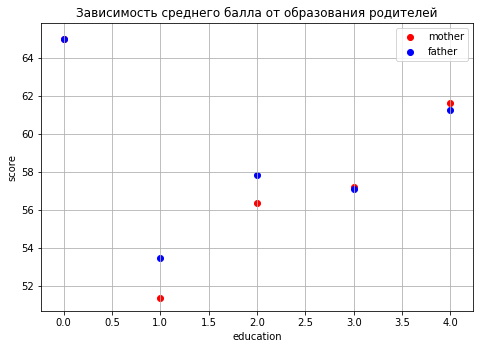

In [69]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = m_frame['m_edu'], y = m_frame['score'], color='red', label='mother')
axes.scatter(x = f_frame['f_edu'], y = f_frame['score'], color='blue', label='father')

plt.title("Зависимость среднего балла от образования родителей")
plt.xlabel("education")
plt.ylabel("score")

axes.legend()
axes.grid(True)

plt.show()

На графике видно, что есть схожесть во влиянии образования обоих родителей на среднее итогового балла score. Можно попробовать заменить пропуски столбца m_edu значениями смтолбца f_edu и наоборот (одновременно столбцы None не содержат!)

In [70]:
students.loc[pd.isnull(students['m_edu']), 'm_edu'] = students['f_edu']
students.loc[pd.isnull(students['f_edu']), 'f_edu'] = students['m_edu']

### m_job и f_job

Попробуем заполнить пропуски модой ('other'):

In [71]:
students.loc[pd.isnull(students['m_job']), 'm_job'] = 'other'
students.loc[pd.isnull(students['f_job']), 'f_job'] = 'other'

### study_time

Мода и медиана для этого столбца совпадает. Заполняем медианой:

In [72]:
students.loc[pd.isnull(students['study_time']), 'study_time'] = students['study_time'].median()

### failures

Пропуски заполним согласно Гипотезе 2 (для score 0-30 взять 1, а для score 31-100 взять 0):

In [73]:
students.loc[pd.isnull(students['failures']), 'failures'] \
  = students.score.apply(lambda x: 0.0 if x > 30 else 1.0)

### school_sup

В столбце всего два значения 0 и 1. Заполним пропуски модой (0):

In [74]:
students.loc[pd.isnull(students['school_sup']), 'school_sup'] = 0.0

### go_out

В этом столбце 8 пропусков. Мода совпадает с медианой (3.0). Заполняем:

In [75]:
students.loc[pd.isnull(students['go_out']), 'go_out'] = 3.0

### guardian, paid, higher, romantic

In [76]:
for col in ['guardian', 'paid', 'higher', 'romantic']:
    display(pd.DataFrame(students[col].value_counts()))
    students.loc[:, [col]].info()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,paid
0.0,200
1.0,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,higher
1.0,356
0.0,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,romantic
0.0,240
1.0,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Согласно Теста Стьюдента, эти столбцы влияют только на введенную нами целевую переменную **null_score**. Не совсем понятно, по какому правилу заполнять пропуски в этих столбцах. Желательно пробовать разные варианты и оценивать правильность по работе модели. Так как у нас пока модель отсутствует, попробуем заполнить пропуски **модой**:

In [77]:
students.loc[pd.isnull(students['guardian']), 'guardian'] = 'mother'
students.loc[pd.isnull(students['paid']), 'paid'] = 0.0
students.loc[pd.isnull(students['higher']), 'higher'] = 1.0
students.loc[pd.isnull(students['romantic']), 'romantic'] = 0.0

### Выводы Этапа 5
На этом этапе мы удалили выбросы и заполнили пропуски в столбцах, которые оказывают влияние на целевые переменные.

[К началу](#Начало)

### Этап 6. Подготовка данных к использованию в моделе <a name="Этап_6._Подготовка_данных_к_использованию_в_моделе"></a>
Пользуясь результатами предыдущих этапов выпишем столбцы, которые влияют на целевые переменные:

1. **age, absences, address, m_edu, f_edu, m_job, f_job, study_time, failures, school_sup, go_out** - влияют на **score**.

2. **m_edu, failures, guardian, paid, higher, romantic** - влияют на **null_score**.

### Таким образом, мы имеем 15 признаков:
**age, absences, address, m_edu, f_edu, m_job, f_job, study_time, failures, school_sup, go_out, guardian, paid, higher, romantic** и две целевые переменные: **score и null_score** для построения модели.

**Целесообразно попробовать построить две различные модели с разным набором признаков и разными целевыми переменными.**

In [78]:
#Датасет для первой модели
students_model_score = students.loc[~pd.isnull(students['score']), ['age', 'absences', 'address', 
                                                                    'm_edu', 'f_edu', 'm_job', 'f_job', 
                                                                    'study_time', 'failures', 'school_sup', 'go_out',
                                                                    'score']]

In [79]:
#Датасет для второй модели
students_model_null_score = students.loc[:, ['m_edu', 'failures', 'guardian', 'paid', 'higher', 'romantic',
                                             'null_score']]

In [80]:
#Убедимся, что отсутствуют пропуски:
display(students_model_score.isnull().sum())
display(students_model_null_score.isnull().sum())

age           0
absences      0
address       0
m_edu         0
f_edu         0
m_job         0
f_job         0
study_time    0
failures      0
school_sup    0
go_out        0
score         0
dtype: int64

m_edu         0
failures      0
guardian      0
paid          0
higher        0
romantic      0
null_score    0
dtype: int64

Пропусков нет!

In [81]:
students_model_score.head(5)

,age,absences,address,m_edu,f_edu,m_job,f_job,study_time,failures,school_sup,go_out,score
0,18.0,6.0,U,4.0,4.0,at_home,teacher,2.0,0.0,1,4.0,30.0
1,17.0,4.0,U,1.0,1.0,at_home,other,2.0,0.0,0,3.0,30.0
2,15.0,10.0,U,1.0,1.0,at_home,other,2.0,3.0,1,2.0,50.0
3,15.0,2.0,U,4.0,2.0,health,other,3.0,0.0,0,2.0,75.0
4,16.0,4.0,U,3.0,3.0,other,other,2.0,0.0,0,2.0,50.0


In [82]:
students_model_null_score.head(5)

,m_edu,failures,guardian,paid,higher,romantic,null_score
0,4.0,0.0,mother,0,1,0,0
1,1.0,0.0,father,0,1,0,0
2,1.0,3.0,mother,0,1,0,0
3,4.0,0.0,mother,1,1,1,0
4,3.0,0.0,father,1,1,0,0


**Замечание:** Так как мы не строим модели на данном этапе обучения, приобразование категориальных признаков в числовую форму не делаем!.

[К началу](#Начало)

### Выводы Этапа 6
В итоге у нас получились два набора признаков и две целевые переменные для двух моделей.

[К началу](#Начало)

### Гипотезы и итоги исследований <a name="Гипотезы_и_итоги_исследований"></a>

#### Анализ EDA показывает, что в наборе 395 строк, 30 столбцов. Преобладают номинативные переменные (все, кроме **score, absences и age**).
#### В данных относительно мало пропусков: больше всего в столбце **Pstatus (11 %)**. Все пропуски заполнены.

#### Также есть выбросы, часть из которых устранена. Так как у нас относительно мало данных (395 строк при 30 столбцах), остальную часть выбросов нужно оценивать по работе моделей.

#### Результаты проверки гипотез:

- Время в пути travel_time для сельских жителей в среднем выше, чем для городских (Гипотеза 1). 
- Чем меньше неудач failures, тем больше итоговый балл score (Гипотеза 2).
- Свободное время freetime и время, проводимое с друзьями go_out связаны: положитедьная корреляция (Гипотеза 3).
- Так как между 0 и 20 значения итогового балла score отсутствуют, то возможно, значения score = 0 и пропуски - это внештатные ситуации, как то неявка на экзамен, студент выбыл, и возможно, другие. Поэтому нужно выделить значения 0 и пропуски в отдельную группу, введя дополнительную бинарную целевую переменную null_score, и анализировать влияние признаков на целевые переменные score и null_score отдельно. Строить две разные модели (Гипотеза 4).
- В целом можно сказать, что с увеличением возраста (age) и числа пропусков занятий (absences) есть тенденция к уменьшению значения экзаменационного балла (Гипотеза 5).

#### В результате работы подготовлены два датасета для двух моделей: students_model_score и students_model_null_score

[К началу](#Начало)